In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

In [4]:
CLIENT_ID = "xxx"
CLIENT_SECRET = "xxx"

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
sp.audio_features(['3t8pnImpBpOwxdtYBpKvA9'])

[{'danceability': 0.676,
  'energy': 0.717,
  'key': 11,
  'loudness': -8.219,
  'mode': 0,
  'speechiness': 0.0874,
  'acousticness': 0.29,
  'instrumentalness': 0.000368,
  'liveness': 0.0974,
  'valence': 0.558,
  'tempo': 157.628,
  'type': 'audio_features',
  'id': '3t8pnImpBpOwxdtYBpKvA9',
  'uri': 'spotify:track:3t8pnImpBpOwxdtYBpKvA9',
  'track_href': 'https://api.spotify.com/v1/tracks/3t8pnImpBpOwxdtYBpKvA9',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3t8pnImpBpOwxdtYBpKvA9',
  'duration_ms': 241000,
  'time_signature': 4}]

In [6]:
sp.playlist('37i9dQZF1DX7QOv5kjbU68')['tracks']['items'][0]['track']['name']

'Toosie Slide'

In [7]:
sp.playlist('37i9dQZF1DX7QOv5kjbU68')['tracks']['items'][0]['track']['artists'][0]['name']

'Drake'

In [10]:
#Seperate out the track listing from the main playlists object
playlistTracks = sp.playlist('37i9dQZF1DX7QOv5kjbU68')['tracks']['items']

#Create empty lists for each datapoint we want to take
artistName = []
trackName = []
trackID = []
trackPop = []

#Loop through each track and append the relevant information to the list 
for index, track in enumerate (playlistTracks):
    artistName.append(track['track']['artists'][0]['name'])
    trackName.append(track['track']['name'])
    trackID.append(track['track']['id'])
    trackPop.append(track['track']['popularity'])

In [11]:
trackName

['Toosie Slide',
 'Oprah’s Bank Account (Lil Yachty & DaBaby feat. Drake)',
 'LOYAL (feat. Drake)',
 'Life Is Good (feat. Drake)',
 'Ela É do Tipo (feat. Drake) - Remix',
 "Won't Be Late (feat. Drake)",
 'Money In The Grave (Drake ft. Rick Ross)',
 'No Guidance (feat. Drake)',
 'Gold Roses (feat. Drake)',
 "God's Plan",
 'Going Bad (feat. Drake)',
 'Passionfruit',
 'One Dance',
 'Nice For What',
 'In My Feelings',
 'Yes Indeed',
 'Best I Ever Had',
 'Girls Need Love (with Drake) - Remix',
 'The Motto',
 'Look Alive (feat. Drake)',
 "F**kin' Problems (feat. Drake, 2 Chainz & Kendrick Lamar)",
 'Mob Ties',
 'Jumpman',
 "Hold On, We're Going Home",
 'Teenage Fever',
 'Nonstop',
 'Started From the Bottom',
 'MIA (feat. Drake)',
 'From Time',
 'Headlines',
 'Hotline Bling',
 'Fake Love',
 'Poetic Justice',
 'Portland',
 'Walk It Talk It',
 'Omertà',
 'All Me',
 'Lust For Life',
 'Trophies',
 'Ignant Shit (feat. Lil Wayne)',
 'Successful (feat. Trey Songz & Lil Wayne)',
 'Houstatlantavegas',

In [16]:
trackName[1] = trackName[1].split("Lil Yachty & DaBaby")[0]
trackName

['Toosie Slide',
 'Oprah’s Bank Account (',
 'No Guidance (feat. Drake)',
 'Life Is Good (feat. Drake)',
 'Ela É do Tipo (feat. Drake) - Remix',
 "Won't Be Late (feat. Drake)",
 'Money In The Grave (Drake ft. Rick Ross)',
 'No Guidance (feat. Drake)',
 'Gold Roses (feat. Drake)',
 "God's Plan",
 'Going Bad (feat. Drake)',
 'Passionfruit',
 'One Dance',
 'Nice For What',
 'In My Feelings',
 'Yes Indeed',
 'Best I Ever Had',
 'Girls Need Love (with Drake) - Remix',
 'The Motto',
 'Look Alive (feat. Drake)',
 "F**kin' Problems (feat. Drake, 2 Chainz & Kendrick Lamar)",
 'Mob Ties',
 'Jumpman',
 "Hold On, We're Going Home",
 'Teenage Fever',
 'Nonstop',
 'Started From the Bottom',
 'MIA (feat. Drake)',
 'From Time',
 'Headlines',
 'Hotline Bling',
 'Fake Love',
 'Poetic Justice',
 'Portland',
 'Walk It Talk It',
 'Omertà',
 'All Me',
 'Lust For Life',
 'Trophies',
 'Ignant Shit (feat. Lil Wayne)',
 'Successful (feat. Trey Songz & Lil Wayne)',
 'Houstatlantavegas',
 'Forever',
 "I'm Upset",

In [17]:
sp.audio_features(trackID[0])

[{'danceability': 0.834,
  'energy': 0.454,
  'key': 1,
  'loudness': -9.75,
  'mode': 0,
  'speechiness': 0.201,
  'acousticness': 0.321,
  'instrumentalness': 6.15e-06,
  'liveness': 0.114,
  'valence': 0.837,
  'tempo': 81.618,
  'type': 'audio_features',
  'id': '127QTOFJsJQp5LbJbu3A1y',
  'uri': 'spotify:track:127QTOFJsJQp5LbJbu3A1y',
  'track_href': 'https://api.spotify.com/v1/tracks/127QTOFJsJQp5LbJbu3A1y',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/127QTOFJsJQp5LbJbu3A1y',
  'duration_ms': 247059,
  'time_signature': 4}]

In [20]:
#How suitable the track is to bust a move, from 0-1
danceability = []

#Detects presence of an audience in the audio, 0-1
liveness = []

#How happy the track is, 0-1
valence = []

#How much the track is spoken word, vs song, 0-1
speechiness = []

#BPM
tempo = []

#Is the track accoustic? 0-1
acousticness = []

#How intense the song is, 0-1
energy = []

for index, track in enumerate (sp.audio_features(trackID)):
    danceability.append(track['danceability'])
    liveness.append(track['liveness'])
    valence.append(track['valence'])
    speechiness.append(track['speechiness'])
    tempo.append(track['tempo'])
    acousticness.append(track['acousticness'])
    energy.append(track['energy'])

In [22]:
dataframe = pd.DataFrame({'Track':trackName, 'Artist':artistName, 'Popularity':trackPop, 'Danceability':danceability,
                         'Liveness':liveness, 'Happiness':valence, 'Speechiness':speechiness, 'Tempo':tempo,
                         'Acousticness':acousticness, 'Energy':energy})
dataframe

,Track,Artist,Popularity,Danceability,Liveness,Happiness,Speechiness,Tempo,Acousticness,Energy
0,Toosie Slide,Drake,96,0.834,0.1140,0.8370,0.2010,81.618,0.3210,0.454
1,Oprah’s Bank Account (,Lil Yachty,84,0.836,0.3190,0.8660,0.0534,138.066,0.1700,0.617
2,No Guidance (feat. Drake),PARTYNEXTDOOR,77,0.866,0.0946,0.2030,0.0495,104.952,0.5170,0.530
3,Life Is Good (feat. Drake),Future,91,0.676,0.1520,0.5080,0.4810,142.037,0.0706,0.609
4,Ela É do Tipo (feat. Drake) - Remix,MC Kevin o Chris,67,0.576,0.1080,0.7150,0.2400,99.387,0.8900,0.524
...,...,...,...,...,...,...,...,...,...,...
69,Can’t Take A Joke,Drake,1,0.878,0.0571,0.4410,0.1430,86.956,0.0410,0.432
70,Still Here,Drake,58,0.833,0.6330,0.2240,0.1940,133.938,0.0267,0.431
71,Emotionless,Drake,2,0.413,0.0811,0.0827,0.2130,173.478,0.0239,0.676
72,That’s How You Feel,Drake,1,0.810,0.1080,0.3590,0.2490,85.417,0.1520,0.451


In [32]:
dataframe.sort_values("Energy", ascending = False).head(10)

,Track,Artist,Popularity,Danceability,Liveness,Happiness,Speechiness,Tempo,Acousticness,Energy
16,Best I Ever Had,Drake,70,0.395,0.1340,0.558,0.3750,162.361,0.19000,0.922
13,Nice For What,Drake,3,0.700,0.0778,0.757,0.0628,93.469,0.08840,0.909
42,Forever,Drake,68,0.457,0.1820,0.540,0.3420,104.020,0.24900,0.906
35,Omertà,Drake,62,0.646,0.2320,0.685,0.2980,164.119,0.03370,0.899
64,Congratulations,Drake,57,0.333,0.2200,0.125,0.1480,86.882,0.01850,0.859
39,Ignant Shit (feat. Lil Wayne),Drake,58,0.591,0.4630,0.121,0.2760,94.795,0.18600,0.846
62,Uptown (feat. Bun B & Lil Wayne),Drake,61,0.416,0.1040,0.417,0.3430,85.433,0.00391,0.824
67,Up All Night,Drake,61,0.606,0.3490,0.276,0.2780,156.347,0.00782,0.811
60,The Motion,Drake,64,0.631,0.1080,0.544,0.1020,157.769,0.37100,0.788
56,Signs,Drake,69,0.794,0.1120,0.223,0.0540,107.374,0.10800,0.735


[]

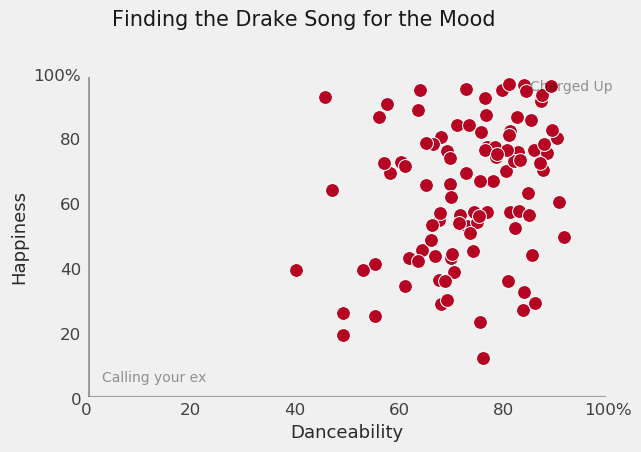

In [48]:
#Set base style and size
plt.style.use('fivethirtyeight')
plt.figure(num=None, figsize=(6, 4), dpi=100)

#Plot data
ax = sns.scatterplot(x="Danceability", y="Happiness", data=dataframe,
                     s=100, color='#b50523')

#Set title
ax.text(x = 0.05, y = 1.15, s = "Finding the Drake Song for the Mood",
        fontsize = 15, alpha = 0.9)

#Set mood examples
ax.text(x = 0.85, y = 0.95, s = "Charged Up",
       fontsize = 10, alpha = 0.4)
ax.text(x = 0.03, y = 0.05, s="Calling your ex",
       fontsize = 10, alpha = 0.4)

#Remove grid and add axis lines
ax.grid(False)
ax.axhline(y=0.005, color='#414141', linewidth=1.5, alpha=.5)
ax.axvline(x=0.005, color='#414141', linewidth=1.5, alpha=.5)

#Set axis limits
ax.set(ylim=(0,1))
ax.set(xlim=(0,1))

#Set axis labels
ax.set_yticklabels(labels=['0', '20', '40', '60', '80','100%'], fontsize=12, color='#414141')
ax.set_xticklabels(labels=['0', '20', '40', '60', '80','100%'], fontsize=12, color='#414141')

#Set axis titles
plt.xlabel('Danceability', fontsize=13, color='#2a2a2b')
plt.ylabel('Happiness', fontsize=13, color='#2a2a2b')

#Plot
ax.plot()